In [1]:
%load_ext autoreload
import os
import numpy as np 
import glob
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from utils import project_pca, calculate_Q_metrics, classify_enterotypes

from warnings import simplefilter
simplefilter('ignore')

%matplotlib inline
%autoreload 2

# Load and preprocess data: Cyanotypes of Canadian Lakes Affected by Blooms

In [ ]:
# # load AGP-HMP data
# !wget https://figshare.com/ndownloader/files/33927092 -O ./data.zip
# !unzip ./data.zip 

In [ ]:
# # Load data from Arumugam et al. 2011
!wget http://www.bork.embl.de/Docu/Arumugam_et_al_2011/data/tables/MetaHIT_41SangerSamples.genus.txt -O MetaHIT_41SangerSamples_genus.txt
# !wget http://www.bork.embl.de/Docu/Arumugam_et_al_2011/data/tables/MetaHIT_85IlluminaSamples.genus.txt -O ./data/MetaHIT_85IlluminaSamples_genus.txt
# !wget http://www.bork.embl.de/Docu/Arumugam_et_al_2011/data/tables/Turnbaugh_154Pyroseq16S.genus.txt -O ./data/Turnbaugh_154Pyroseq16S_genus.txt
!wget https://enterotype.embl.de/MetaHIT_SangerSamples.genus.txt -O MetaHIT_33SangerSamples_genus.txt

In [2]:
data_orig = {}
y_orig = {}

for dataset_name in tqdm(['PLSF', 'StCh', 'Buff', 'Champ', 'Conest', 'Argal', 'VB', 'Wool', 'rotor' , 'otherLake']):
    for tax in ['g']: 
        dataframe = pd.read_csv(f'./data/{dataset_name}_{tax}.csv', sep=';')
        label = f'{dataset_name}_{tax}'
        #data_orig[label] = dataframe.drop('ENKI', axis=1)
        dataframe = dataframe.drop('ENKI', axis=1)
        data_orig[label] = dataframe.dropna()
        
        # Assuming your DataFrame is named 'dataframe'
        #dataframe = dataframe.drop('ENKI', axis=1)
        #dataframe = dataframe.replace([np.inf, -np.inf], np.nan)
        #dataframe = dataframe[~dataframe.isin([np.nan, np.inf, -np.inf]).any(1)]
        #dataframe = dataframe.dropna()
        print(dataframe.head())
        #dataframe = dataframe.astype('float64')
        max_value = dataframe.values.max()
        min_value = dataframe.values.min()


processed_root = 'data_processed_small'
pca_root = './results/pca'

 20%|████████████████████▌                                                                                  | 2/10 [00:00<00:00,  8.05it/s]

   g__Maribacter  g__Vibrio  g__Sulfitobacter  g__Agromyces  g__Pseudomonas  \
0   7.430357e-07   0.000050          0.000000           0.0        0.001146   
1   0.000000e+00   0.000014          0.000001           0.0        0.001272   
2   1.043017e-06   0.003493          0.000024           0.0        0.003992   
3   0.000000e+00   0.000692          0.000005           0.0        0.001702   
4   0.000000e+00   0.000394          0.000000           0.0        0.001745   

   g__Croceicoccus  g__Serratia  g__Paenibacillus  g__Nitratireductor  \
0         0.000007     0.000004          0.000008            0.000002   
1         0.000002     0.000005          0.000013            0.000005   
2         0.000033     0.000000          0.000020            0.000006   
3         0.000004     0.000000          0.000014            0.000003   
4         0.000003     0.000000          0.000012            0.000001   

   g__Dietzia  ...  g__Permianibacter  g__Brasilonema  g__Pseudofrankia  \
0    0.0000

 30%|██████████████████████████████▉                                                                        | 3/10 [00:00<00:00,  8.40it/s]

   g__Maribacter  g__Vibrio  g__Sulfitobacter  g__Agromyces  g__Pseudomonas  \
0            0.0   0.000023          0.000016      0.000000        0.000793   
1            0.0   0.000037          0.000019      0.000003        0.000669   
2            0.0   0.000036          0.000010      0.000000        0.000802   
3            0.0   0.000031          0.000021      0.000000        0.000582   
4            0.0   0.000045          0.000011      0.000000        0.000756   

   g__Croceicoccus  g__Serratia  g__Paenibacillus  g__Nitratireductor  \
0         0.000008     0.000004          0.000036        2.048830e-06   
1         0.000005     0.000003          0.000032        2.552686e-06   
2         0.000007     0.000004          0.000037        1.240234e-06   
3         0.000000     0.000004          0.000032        1.619802e-06   
4         0.000000     0.000003          0.000028        9.561316e-07   

   g__Dietzia  ...  g__Permianibacter  g__Brasilonema  g__Pseudofrankia  \
0    0.0000

 50%|███████████████████████████████████████████████████▌                                                   | 5/10 [00:00<00:00,  5.84it/s]

   g__Maribacter  g__Vibrio  g__Sulfitobacter  g__Agromyces  g__Pseudomonas  \
0            0.0   0.000125               0.0           0.0        0.001450   
1            0.0   0.000131               0.0           0.0        0.001514   
2            0.0   0.000157               0.0           0.0        0.001819   
3            0.0   0.000125               0.0           0.0        0.001450   
4            0.0   0.000131               0.0           0.0        0.001514   

   g__Croceicoccus  g__Serratia  g__Paenibacillus  g__Nitratireductor  \
0              0.0          0.0          0.000013            0.000003   
1              0.0          0.0          0.000014            0.000003   
2              0.0          0.0          0.000016            0.000004   
3              0.0          0.0          0.000013            0.000003   
4              0.0          0.0          0.000014            0.000003   

   g__Dietzia  ...  g__Permianibacter  g__Brasilonema  g__Pseudofrankia  \
0         0

 80%|██████████████████████████████████████████████████████████████████████████████████▍                    | 8/10 [00:01<00:00,  8.55it/s]

   g__Maribacter  g__Vibrio  g__Sulfitobacter  g__Agromyces  g__Pseudomonas  \
0   2.442404e-06   0.000027          0.000010      0.000000        0.000339   
1   4.242346e-07   0.000049          0.000013      0.000002        0.000407   
2   3.735876e-07   0.000062          0.000015      0.000004        0.000516   
3   9.820201e-07   0.000037          0.000000      0.000000        0.000361   
4   0.000000e+00   0.000064          0.000021      0.000003        0.000455   

   g__Croceicoccus  g__Serratia  g__Paenibacillus  g__Nitratireductor  \
0         0.000013          0.0          0.000015        0.000000e+00   
1         0.000012          0.0          0.000025        1.239212e-06   
2         0.000006          0.0          0.000038        5.410579e-07   
3         0.000000          0.0          0.000018        0.000000e+00   
4         0.000033          0.0          0.000013        1.709826e-06   

   g__Dietzia  ...  g__Permianibacter  g__Brasilonema  g__Pseudofrankia  \
0    0.0000

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.65it/s]

   g__Maribacter  g__Vibrio  g__Sulfitobacter  g__Agromyces  g__Pseudomonas  \
0       0.000019   0.000011          0.000031      0.000019        0.002070   
1       0.000019   0.000011          0.000031      0.000019        0.002070   
2       0.000017   0.000011          0.000033      0.000030        0.001752   
3       0.000017   0.000011          0.000033      0.000030        0.001752   
4       0.000006   0.000026          0.000054      0.000030        0.002066   

   g__Croceicoccus  g__Serratia  g__Paenibacillus  g__Nitratireductor  \
0         0.000047     0.000124          0.000012            0.000001   
1         0.000047     0.000124          0.000012            0.000001   
2         0.000014     0.000012          0.000209            0.000002   
3         0.000014     0.000012          0.000209            0.000002   
4         0.000019     0.000012          0.000077            0.000004   

   g__Dietzia  ...  g__Permianibacter  g__Brasilonema  g__Pseudofrankia  \
0         0

In [ ]:
# # uncomment to use synthetic data

# data_orig = {}
# for path in glob.glob('data/synthetic/*'):
#     dataframe = pd.read_csv(path, index_col=0)
#     label = path.split('/')[-1]
#     data_orig[label] = dataframe.drop('target', axis=1)

# processed_root = 'data_processed/synthetic'
# pca_root = './results/pca/synthetic'

# Preprocessing

In [3]:
def index_to_mask(index, N_orig):
    
    mask = np.zeros((N_orig))
    
    for i in index:
        mask[i] = 1
    return mask.astype(bool)

# requirement that OTU shound be present at least in RARITY_THRESHOLD percentage of population
RARITY_THRESHOLD = 0.01 
# requirement that OTU variance among population 
STD_THRESHOLD = 1e-3
PATHOLOGICAL_ABUNDANCE_THRESHOLD = None #0.7 

if PATHOLOGICAL_ABUNDANCE_THRESHOLD is not None:
    DATA_SPECIFICATION = f'_pat{PATHOLOGICAL_ABUNDANCE_THRESHOLD}'

else:
    DATA_SPECIFICATION = ''
    
processed_root = processed_root + DATA_SPECIFICATION
os.makedirs(processed_root, exist_ok=True)

preprocessed_data = {}
preprocessing_mask = {}
y_orig = {}
save_y_orig = False

for label, df in data_orig.items():
            
    df_proc = df.copy()
    df_proc.drop_duplicates(inplace=True)
    N = df_proc.shape[0]
    
    # too rare OTU
    rare_otu_mask = (df_proc > 0).sum(0) / N < RARITY_THRESHOLD
    
    # too low std
    std_otu_mask = df_proc.std(0) < STD_THRESHOLD
    
    mask = rare_otu_mask + std_otu_mask
    df_proc = df_proc.iloc[:,~mask.values]
    
    if PATHOLOGICAL_ABUNDANCE_THRESHOLD is not None:
        path_abundance_mask = df_proc.max(1) < PATHOLOGICAL_ABUNDANCE_THRESHOLD
        df_proc = df_proc[path_abundance_mask]
    
    preprocessed_data[label] = df_proc
    preprocessing_mask[label] = index_to_mask(df_proc.index, df.shape[0])
    
    path = os.path.join(processed_root, f'{label}.csv')
    df_proc.to_csv(path)
    
    n0 = df.shape[0] 
    n1 = df_proc.shape[0]
    
    print(f'{label} Data preserved: {n1/n0}')
    print(f'{label} Orig shape: {df.shape}, processed shape: {df_proc.shape}')
    
    dataset_name, tax = label.split('_')
    # calculate pre-defined enterotype labels 
    if tax == 'g' and dataset_name in ['caca']:
        y_orig[dataset_name] = classify_enterotypes(df_proc)
        save_y_orig = True
        
        
np.save(os.path.join(processed_root, 'preprocessing_mask'), preprocessing_mask)
if save_y_orig:
    np.save(os.path.join(processed_root,'enterotypes_clf'), y_orig)

PLSF_g Data preserved: 1.0
PLSF_g Orig shape: (176, 1954), processed shape: (176, 21)
StCh_g Data preserved: 1.0
StCh_g Orig shape: (106, 1954), processed shape: (106, 17)
Buff_g Data preserved: 1.0
Buff_g Orig shape: (160, 1954), processed shape: (160, 21)
Champ_g Data preserved: 0.3803921568627451
Champ_g Orig shape: (1020, 1954), processed shape: (388, 36)
Conest_g Data preserved: 1.0
Conest_g Orig shape: (110, 1954), processed shape: (110, 14)
Argal_g Data preserved: 1.0
Argal_g Orig shape: (50, 1954), processed shape: (50, 13)
VB_g Data preserved: 1.0
VB_g Orig shape: (53, 1954), processed shape: (53, 17)
Wool_g Data preserved: 1.0
Wool_g Orig shape: (11, 1954), processed shape: (11, 11)
rotor_g Data preserved: 0.5
rotor_g Orig shape: (70, 1954), processed shape: (35, 17)
otherLake_g Data preserved: 0.5922330097087378
otherLake_g Orig shape: (103, 1954), processed shape: (61, 22)


# PCA

In [4]:
SAVE= True
pca_root = pca_root + DATA_SPECIFICATION
os.makedirs(pca_root, exist_ok=True)

data_pca = {}
pca_models = {}

for label, df in preprocessed_data.items():
    
    data_projected, pca, pca_proj, mae = project_pca(df, whiten=False)
       
    d_pca = data_projected.shape[1]
    d = df.shape[1]
    
    Q_loc, Q_glob = calculate_Q_metrics(df.values, data_projected)
    print(f'For {label}, dim orig: {d}, dim PCA: {d_pca}, mae: {np.round(mae,3)}, Q_loc: {np.round(Q_loc,3)}, Q_glob: {np.round(Q_glob,3)}')
    
    data_pca[label] = data_projected
    pca_models[label] = pca
    
    if SAVE:
        path = os.path.join(pca_root, f'{label}')
        np.savetxt(path, data_projected, delimiter = ';')

For PLSF_g, dim orig: 21, dim PCA: 3, mae: 0.169, Q_loc: 0.732, Q_glob: 0.949
For StCh_g, dim orig: 17, dim PCA: 8, mae: 0.211, Q_loc: 0.838, Q_glob: 0.963
For Buff_g, dim orig: 21, dim PCA: 6, mae: 0.179, Q_loc: 0.886, Q_glob: 0.988
For Champ_g, dim orig: 36, dim PCA: 9, mae: 0.214, Q_loc: 0.879, Q_glob: 0.962
For Conest_g, dim orig: 14, dim PCA: 8, mae: 0.147, Q_loc: 0.822, Q_glob: 0.975
For Argal_g, dim orig: 13, dim PCA: 1, mae: 0.11, Q_loc: 0.833, Q_glob: 0.995
For VB_g, dim orig: 17, dim PCA: 1, mae: 0.39, Q_loc: 0.73, Q_glob: 0.984
For Wool_g, dim orig: 11, dim PCA: 2, mae: 0.12, Q_loc: 0.818, Q_glob: 0.963
For rotor_g, dim orig: 17, dim PCA: 4, mae: 0.218, Q_loc: 0.857, Q_glob: 0.962
For otherLake_g, dim orig: 22, dim PCA: 4, mae: 0.373, Q_loc: 0.626, Q_glob: 0.889


{'PLSF': 'maroon', 'StCh': 'steelblue', 'Buff': 'green', 'Champ': 'yellow', 'Conest': 'orange', 'Argal': 'purple', 'VB': 'cyan', 'Wool': 'magenta', 'rotor': 'brown', 'otherLake': 'lime'}


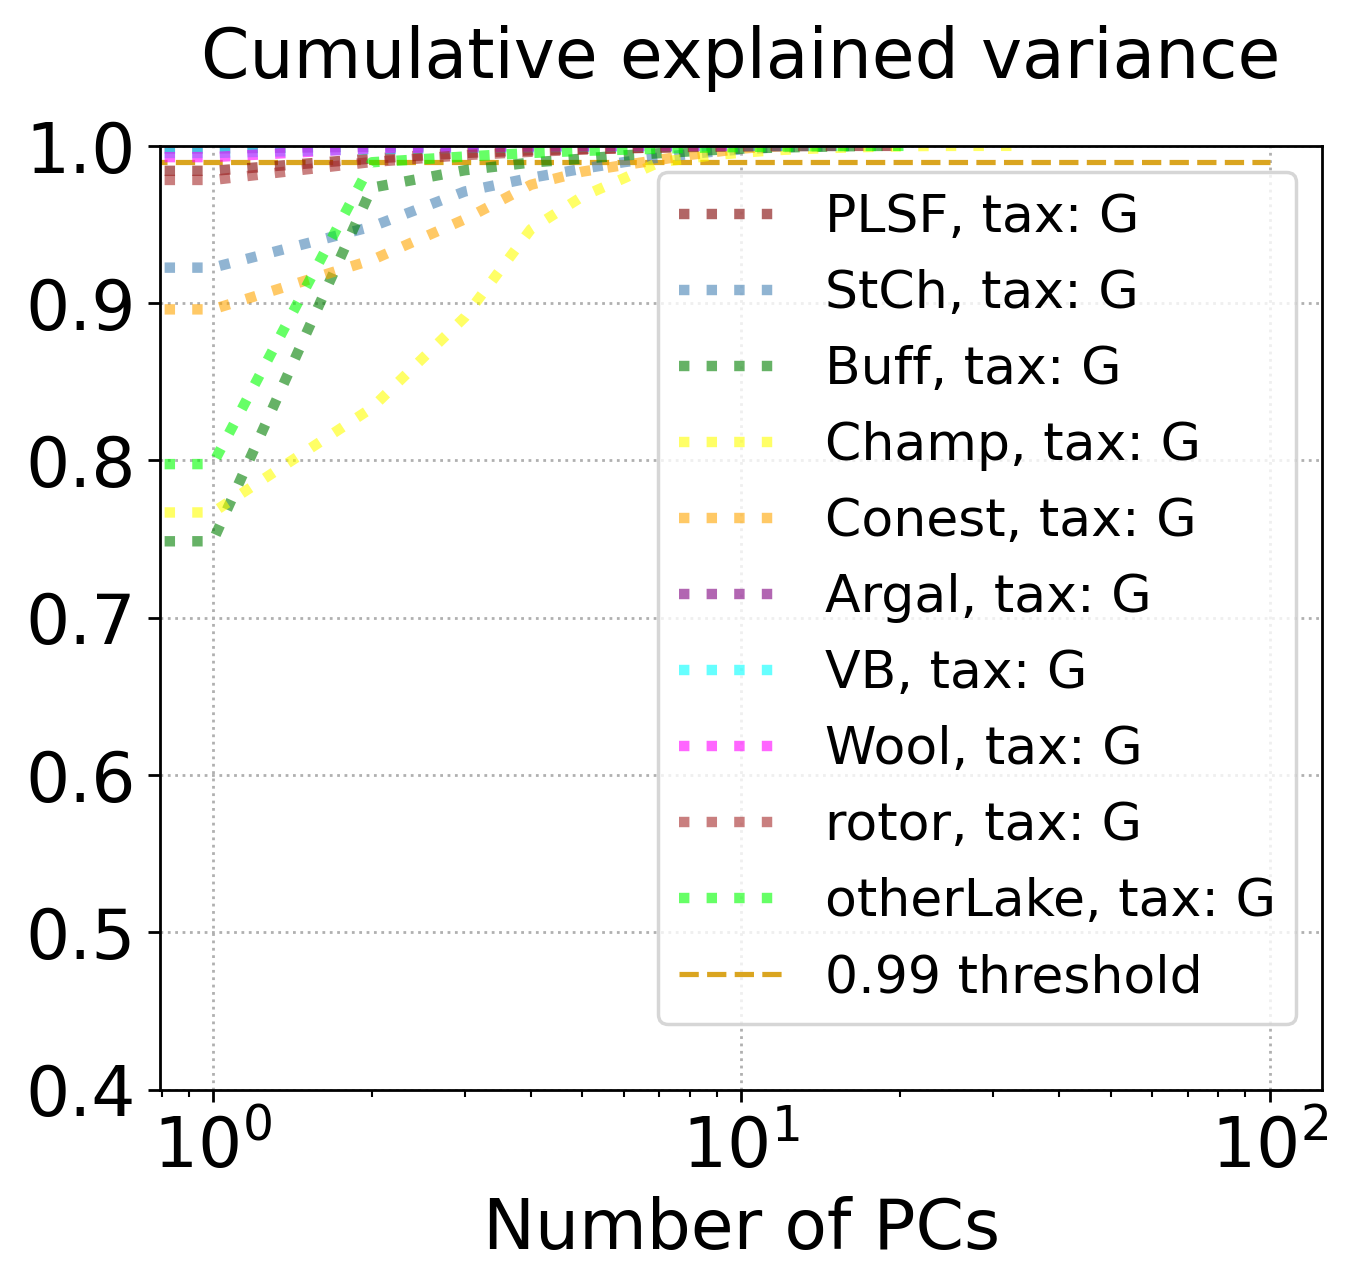

In [5]:
#color_dict = {'AGP':'maroon', 'HMP':'steelblue'}
lakes = ['PLSF', 'StCh', 'Buff', 'Champ', 'Conest', 'Argal', 'VB', 'Wool', 'rotor', 'otherLake']

colors = ['maroon', 'steelblue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'lime']

color_dict = {lake: color for lake, color in zip(lakes, colors)}

print(color_dict)

linestyle_dict = {'o':'solid', 'f':'dashed', 'g':'dotted'}

plt.rcParams.update({'font.size': 20, 'axes.titley':1.05})

plt.figure(figsize=(6,5), dpi=250)
plt.title(f"Cumulative explained variance", fontsize=20)
plt.xlabel("Number of PCs", fontsize=20)

plt.grid(linestyle="dotted")

cols = {}
scores = {}

for label,pca in pca_models.items():
    
    if not label.split('_')[0] in color_dict:
        continue
    
    ev = np.cumsum(pca.explained_variance_ratio_)
    
    dataset_name, tax_name = label.split('_')
    
    label_neat = dataset_name + f', tax: {tax_name.capitalize()}'
    
    plt.plot(ev, 
             linewidth=3, 
             label=label_neat,
             alpha=0.6,
             color=color_dict[dataset_name],
             linestyle=linestyle_dict[tax_name]
            )  
    
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    loadings_scores = np.linalg.norm(loadings, axis=1)
    
    cols[label] = [c.split('__')[1] for c in preprocessed_data[label].columns]
    scores[label] = loadings_scores
    
    try:
        aux_ind = cols[label].index('')
        cols[label].pop(aux_ind)
        scores[label] = np.delete(scores[label], aux_ind)
    except:
        pass
    
plt.hlines(0.99,0,100,linestyle='--', label='0.99 threshold', color='goldenrod')

plt.xscale('log')
plt.ylim(0.4, 1.)
plt.legend(fontsize=15)    
plt.show()

IndexError: index 5 is out of bounds for axis 0 with size 5

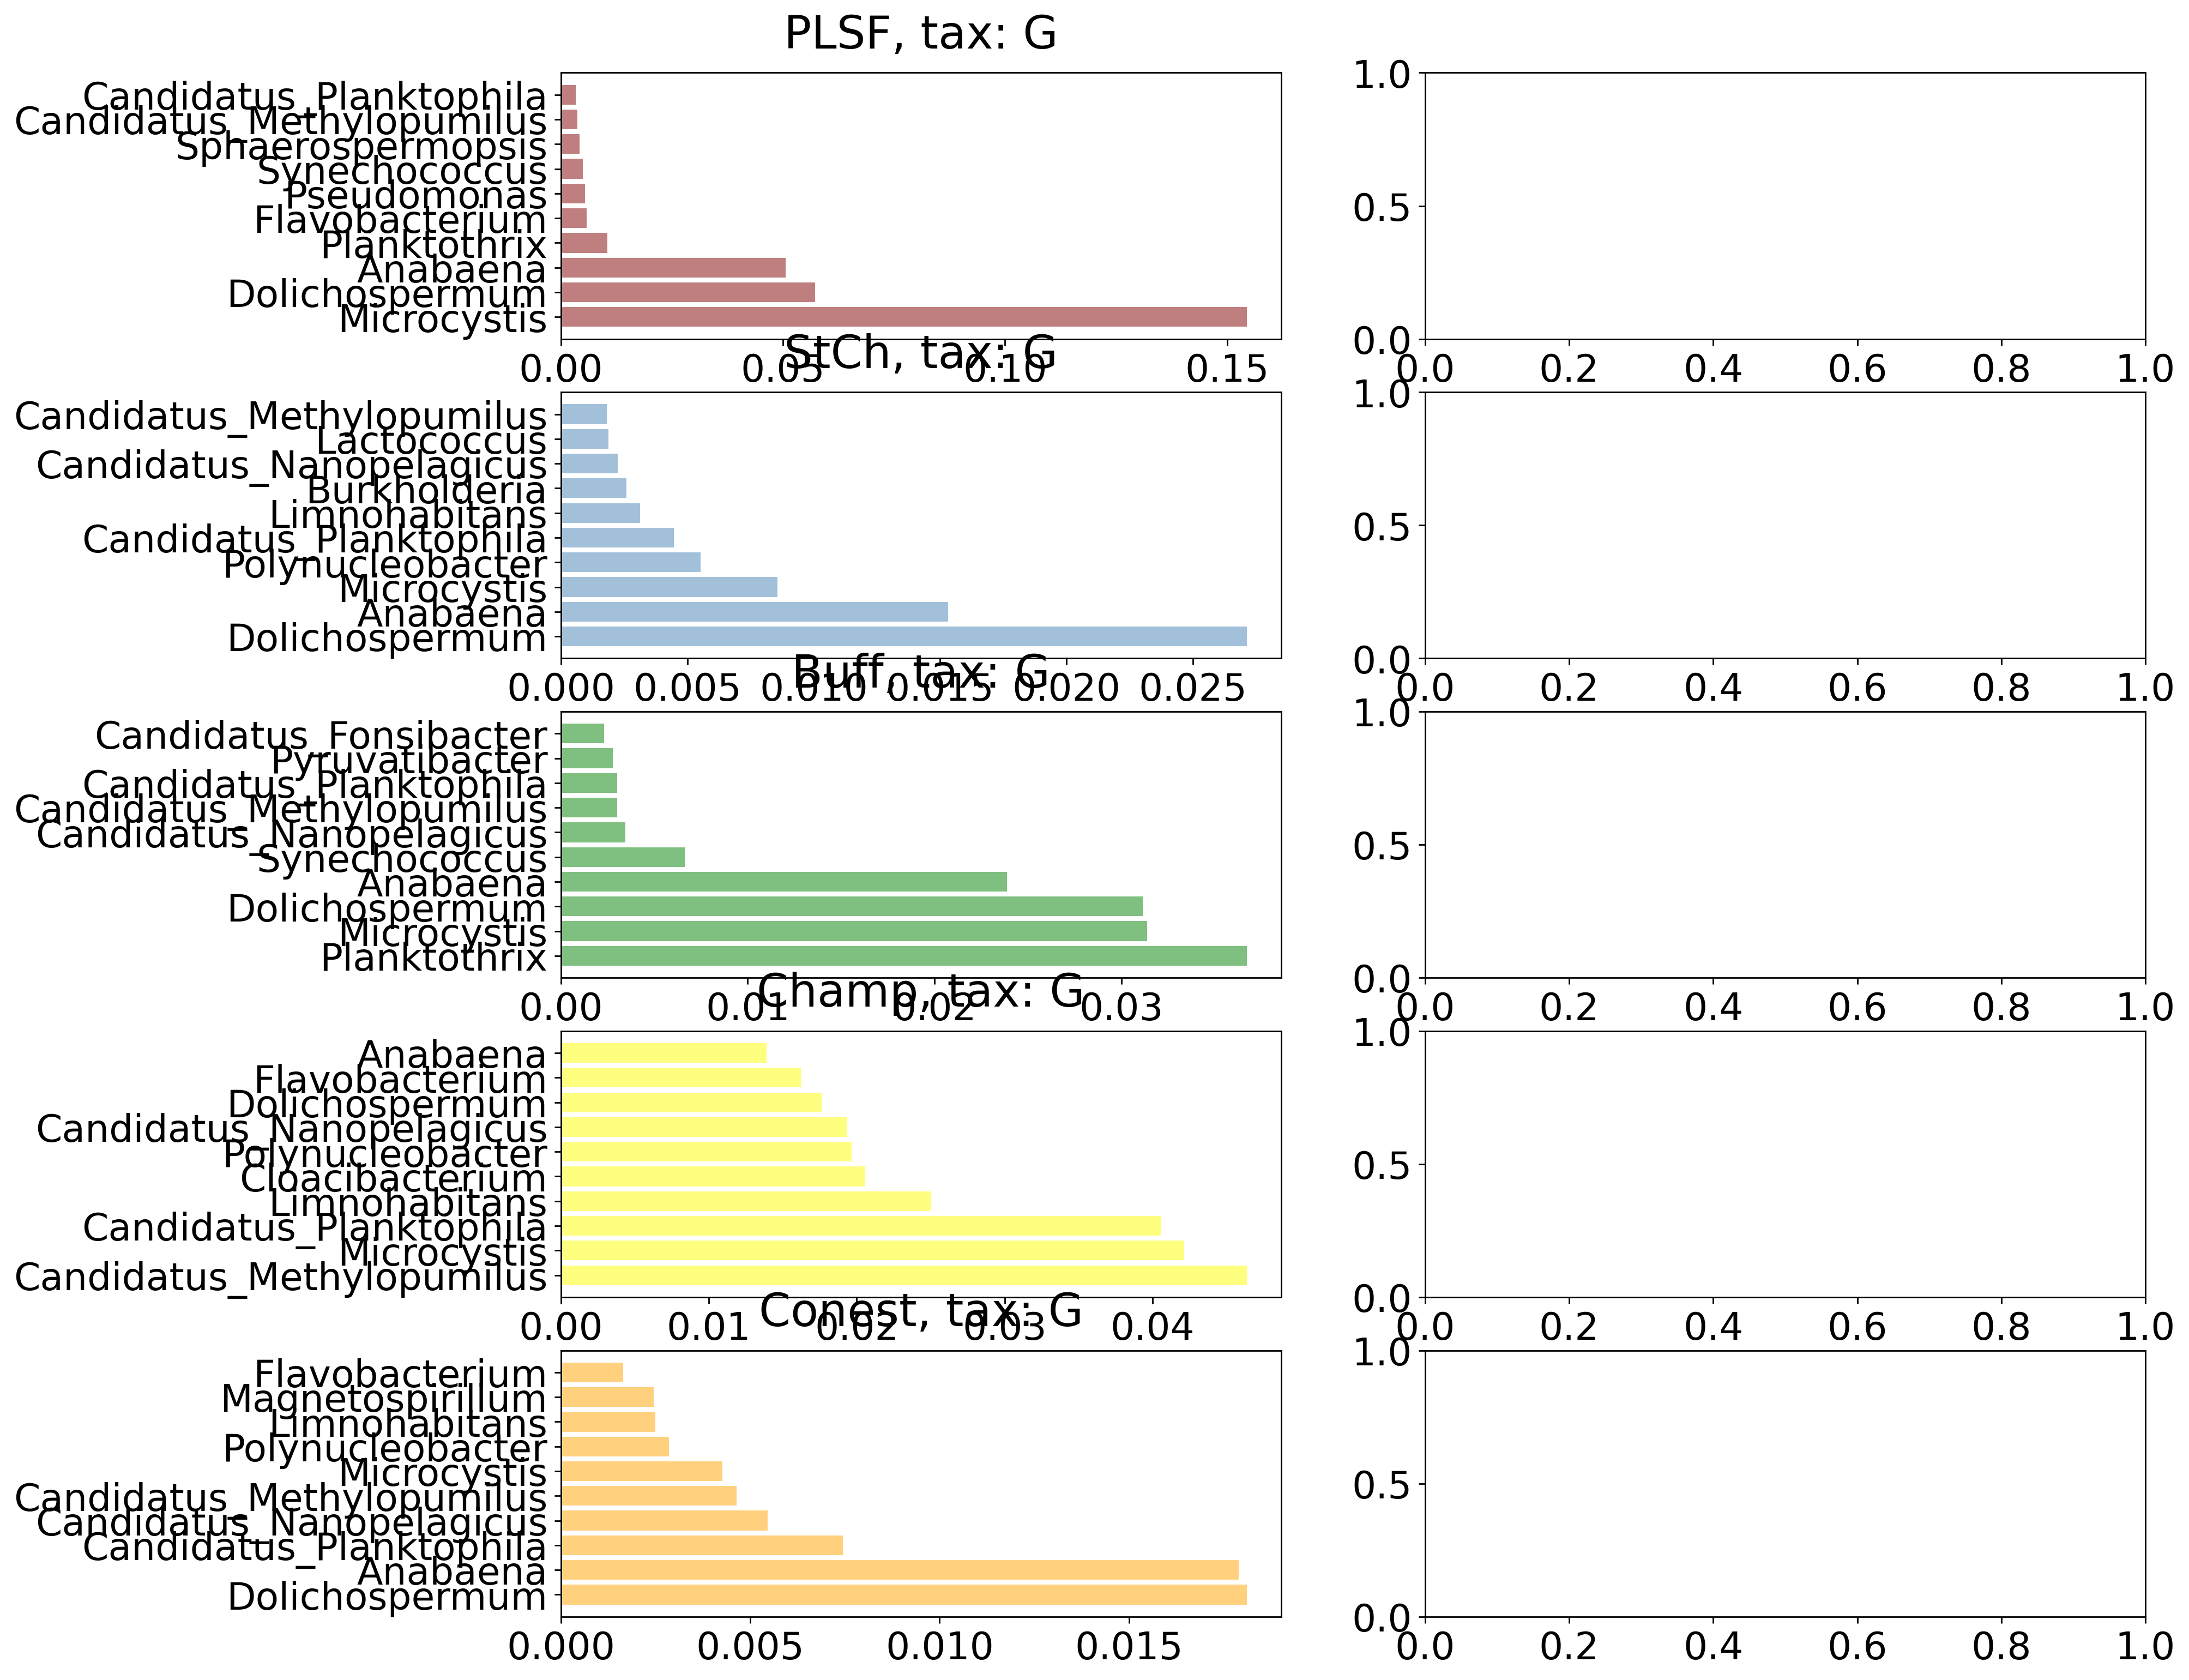

In [6]:
nshow = 10

sorted_cols = {}

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(15,15), sharey=False, dpi=250)

for i,dataset_name in enumerate(['PLSF', 'StCh', 'Buff', 'Champ', 'Conest', 'Argal', 'VB', 'Wool', 'rotor', 'otherLake']):
    for j,tax in enumerate(['g']): 

        label = '_'.join([dataset_name, tax])
        score_label = scores[label]

        scores_argsort = score_label.argsort()[::-1]

        scores_sorted = score_label[scores_argsort]
        labels_sorted = np.array(cols[label])[scores_argsort]

        axes[i,j].barh(labels_sorted[:nshow],
                scores_sorted[:nshow],
                alpha=0.5, 
                color=color_dict[dataset_name]
               )

        axes[i,j].set_title(dataset_name + f', tax: {tax.capitalize()}')

plt.tight_layout()
plt.show()

# Small datasets PCA

{'PLSF': 'maroon', 'StCh': 'steelblue', 'Buff': 'green', 'Champ': 'yellow', 'Conest': 'orange', 'Argal': 'purple', 'VB': 'cyan', 'Wool': 'magenta', 'rotor': 'brown', 'otherLake': 'lime'}
'' is not in list
'1' is not in list
'-1' is not in list
'' is not in list
'1' is not in list
'-1' is not in list
'' is not in list
'1' is not in list
'-1' is not in list
'' is not in list
'1' is not in list
'-1' is not in list
'' is not in list
'1' is not in list
'-1' is not in list
'' is not in list
'1' is not in list
'-1' is not in list
'' is not in list
'1' is not in list
'-1' is not in list
'' is not in list
'1' is not in list
'-1' is not in list
'' is not in list
'1' is not in list
'-1' is not in list
'' is not in list
'1' is not in list
'-1' is not in list


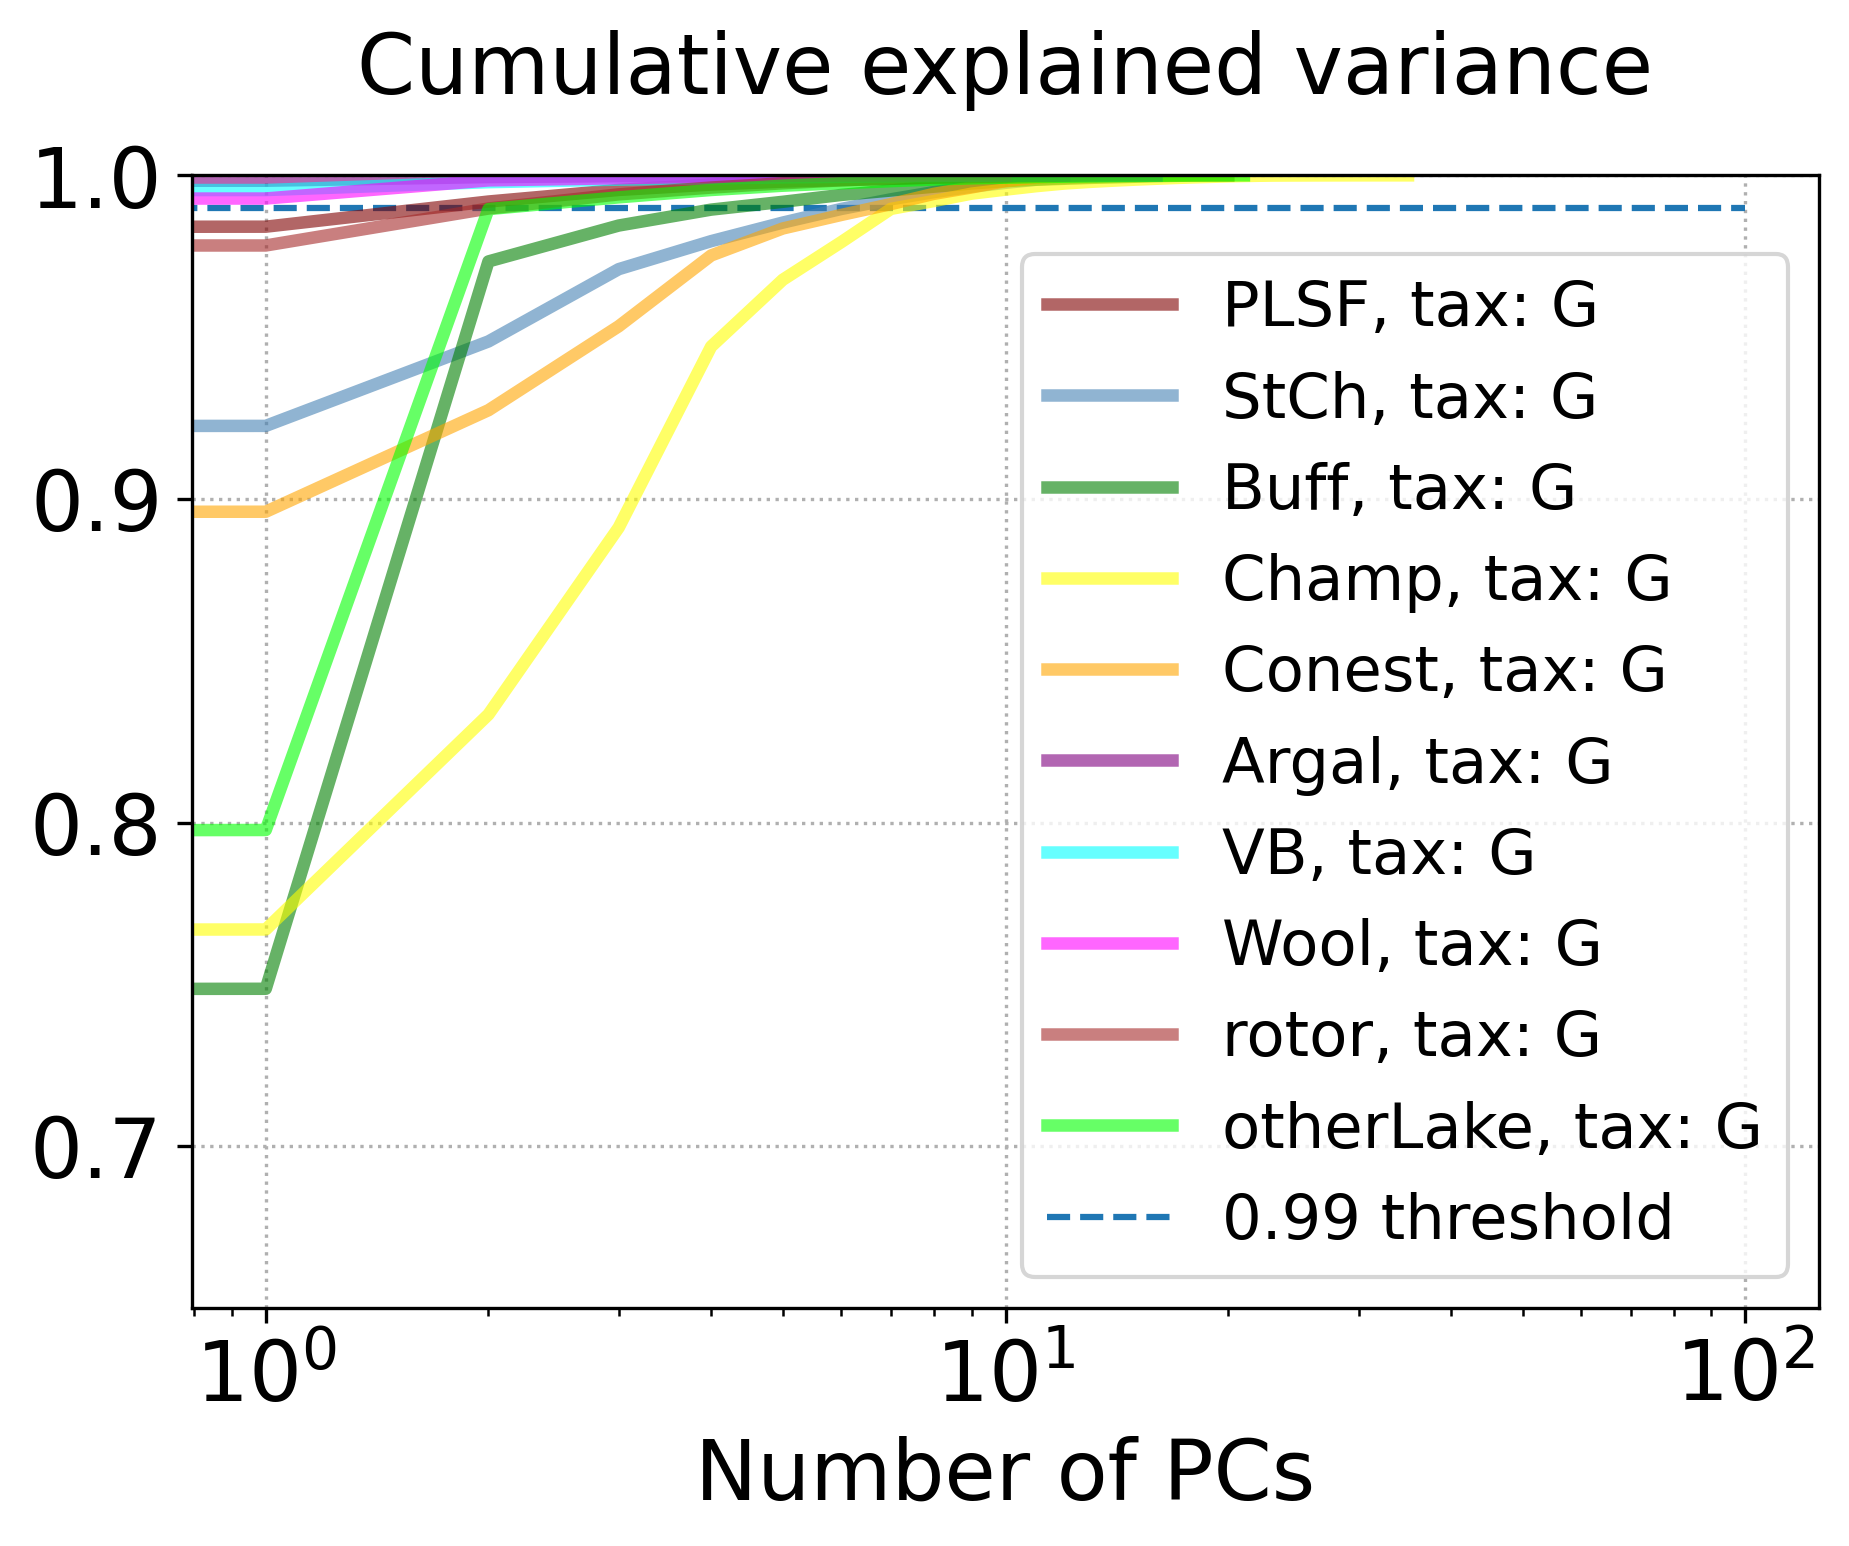

In [7]:
#color_dict = {'Sanger': 'teal', 'Illumina':'peru'}
# , 'Illumina':'peru', 'Pyroseq':'purple'}

lakes = ['PLSF', 'StCh', 'Buff', 'Champ', 'Conest', 'Argal', 'VB', 'Wool', 'rotor', 'otherLake']

colors = ['maroon', 'steelblue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'lime']

color_dict = {lake: color for lake, color in zip(lakes, colors)}

print(color_dict)


plt.rcParams.update({'font.size': 20, 'axes.titley': 1.05})
plt.figure(figsize=(7, 5), dpi=300)
plt.title(f"Cumulative explained variance", fontsize=20)
plt.xlabel("Number of PCs", fontsize=20)

plt.grid(linestyle="dotted")

cols = {}
scores = {}

for label, pca in pca_models.items():
    if not label.split('_')[0] in color_dict:
        continue

    ev = np.cumsum(pca.explained_variance_ratio_)

    dataset_name, tax_name = label.split('_')
    label_neat = dataset_name + f', tax: {tax_name.capitalize()}'

    plt.plot(ev,
             linewidth=3,
             label=label_neat,
             alpha=0.6,
             color=color_dict[dataset_name],
             linestyle='solid'
             )

    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    loadings_scores = np.linalg.norm(loadings, axis=1)

    cols[label] = list(preprocessed_data[label].columns)
    scores[label] = loadings_scores

    for aux_col in ['', '1', '-1']:
        try:
            aux_ind = cols[label].index(aux_col)
            cols[label].pop(aux_ind)
            scores[label] = np.delete(scores[label], aux_ind)
        except Exception as e:
            print(e)
            continue

plt.hlines(0.99, 0, 100, linestyle='--', label='0.99 threshold')

plt.xscale('log')
plt.ylim(0.65, 1.)
plt.legend(fontsize=15, loc='lower right')
plt.show()


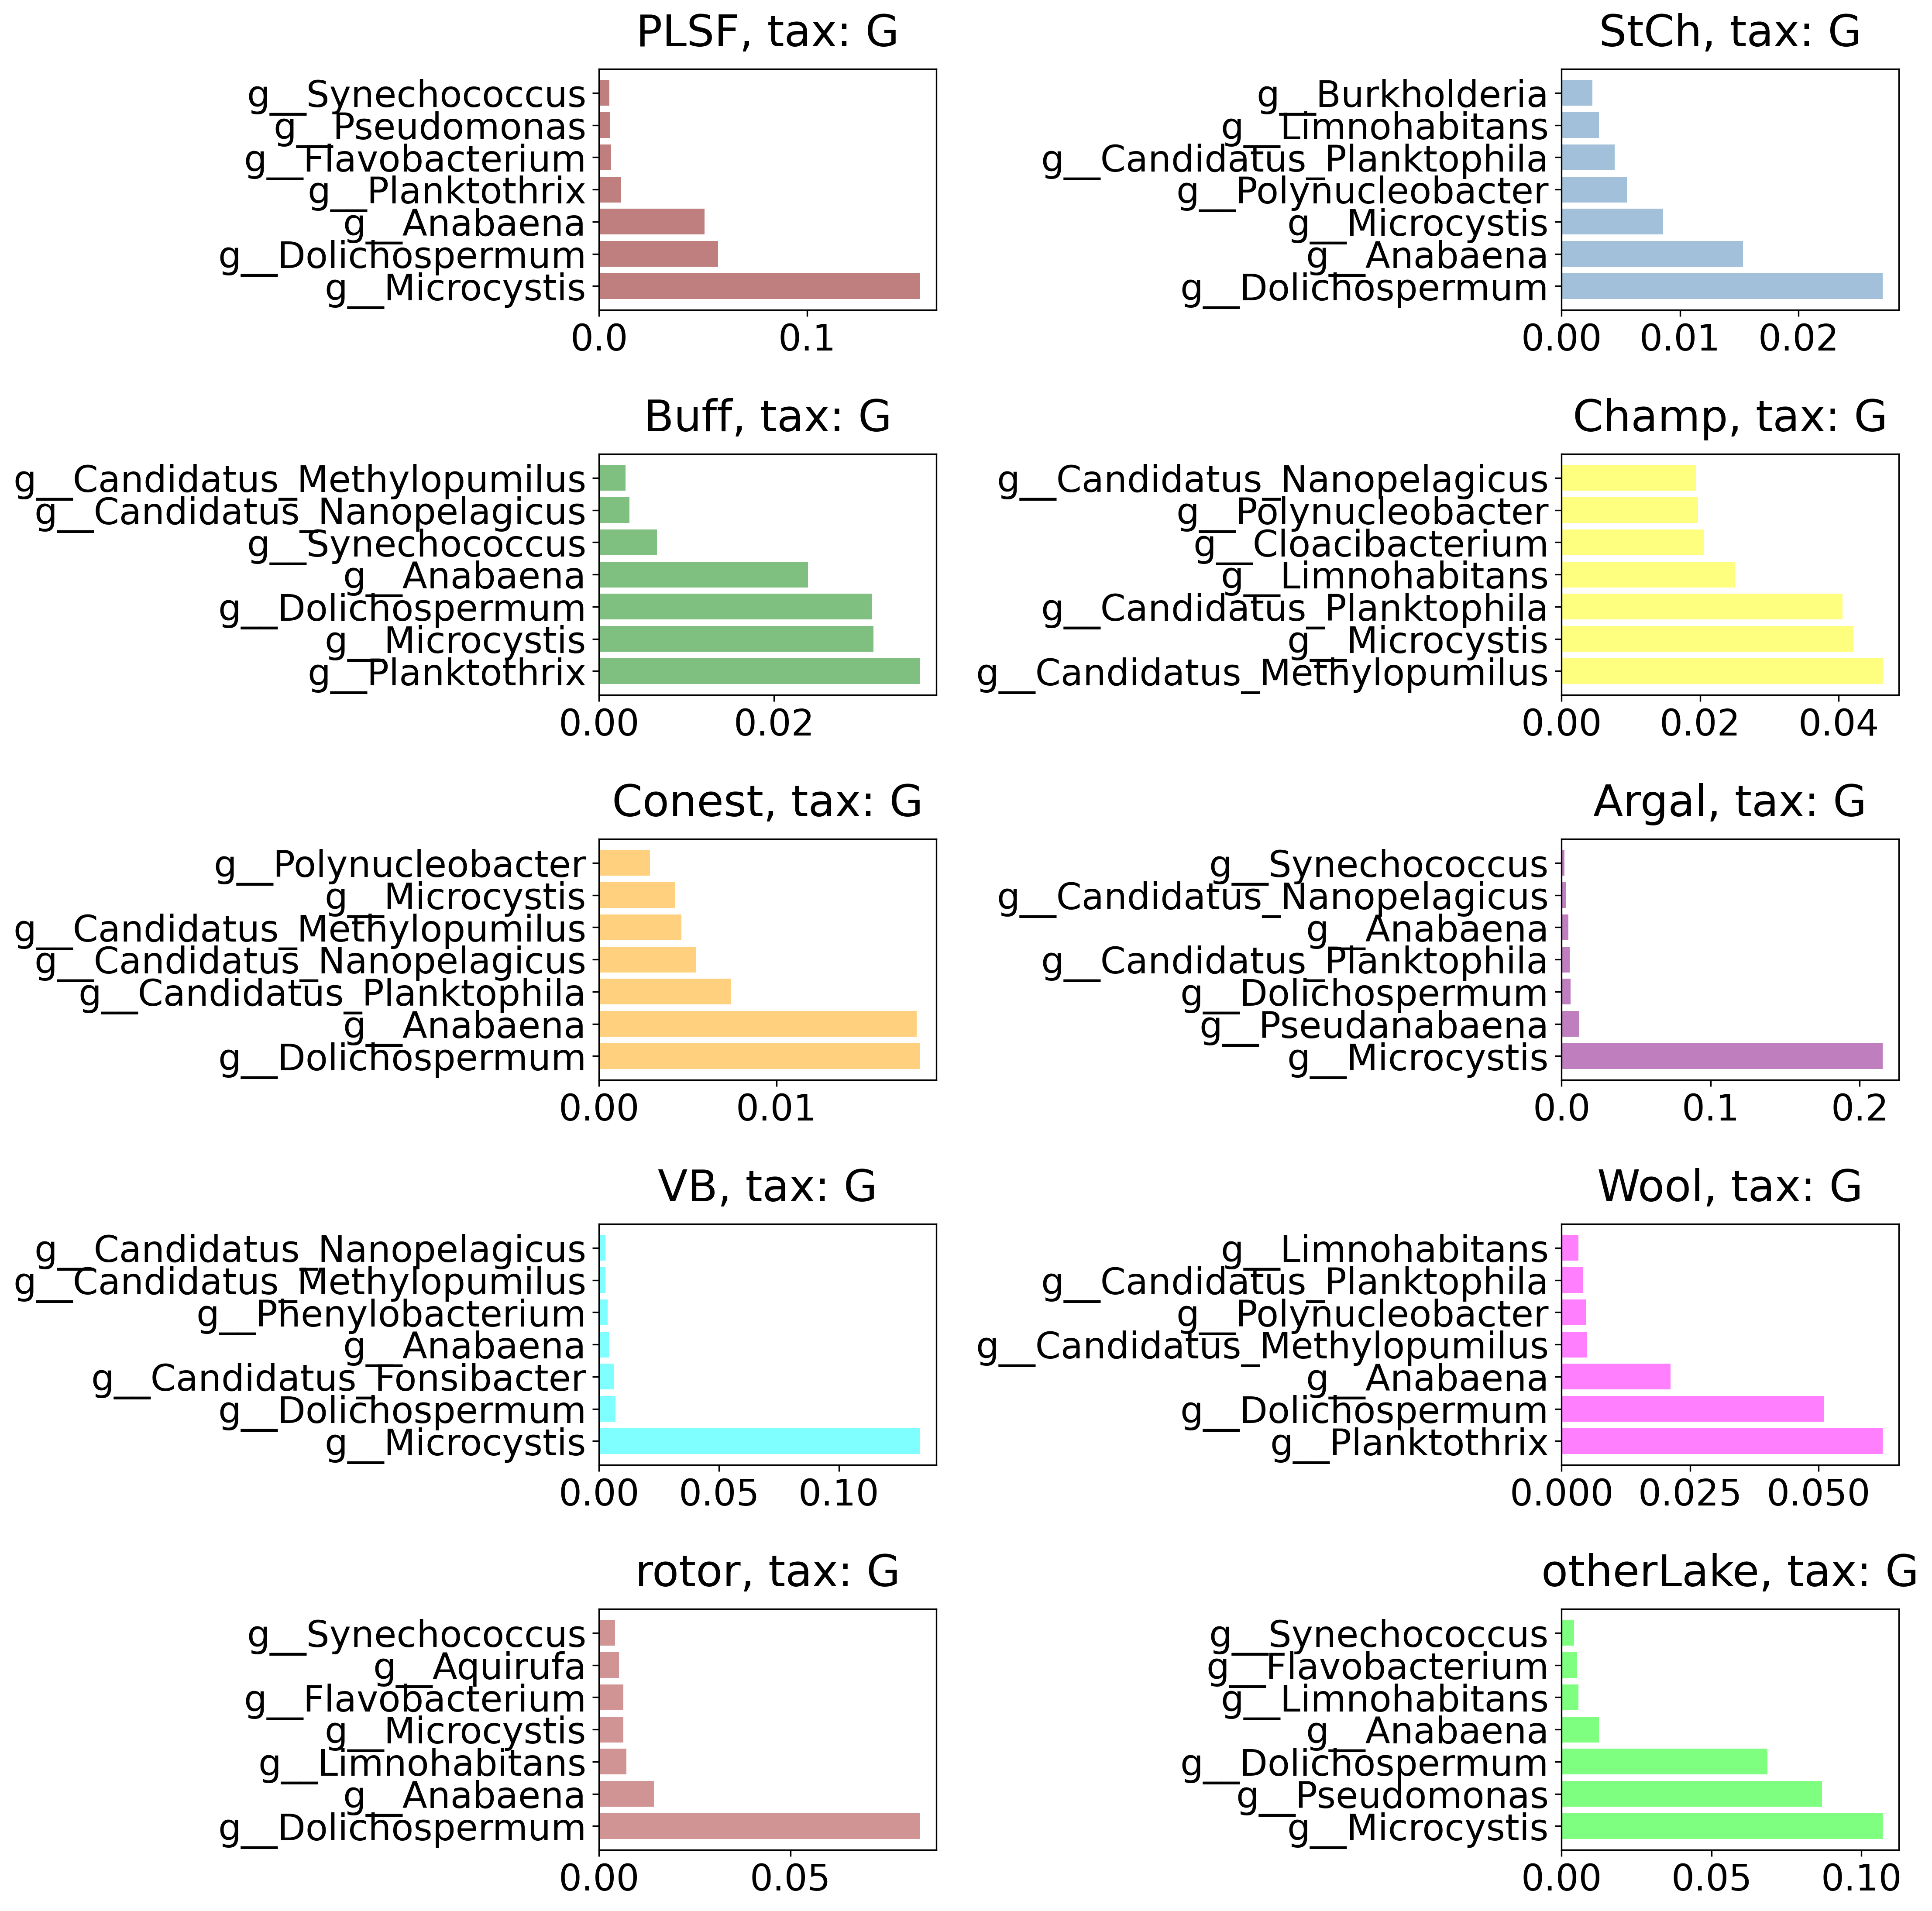

In [8]:
nshow = 7

sorted_cols = {}

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(15,15), dpi=300)
for i, (label, score_label) in enumerate(scores.items()):

    scores_argsort = score_label.argsort()[::-1]
    
    scores_sorted = score_label[scores_argsort]
    labels_sorted = np.array(cols[label])[scores_argsort]

    dataset_name, tax_name = label.split('_')
    
    # Modify indexing here to work with the 2D axes array
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    ax.barh(labels_sorted[:nshow],
            scores_sorted[:nshow],
            alpha=0.5, 
            color=color_dict[dataset_name]
        )

    ax.set_title(dataset_name + f', tax: G')  

plt.tight_layout()
plt.show()


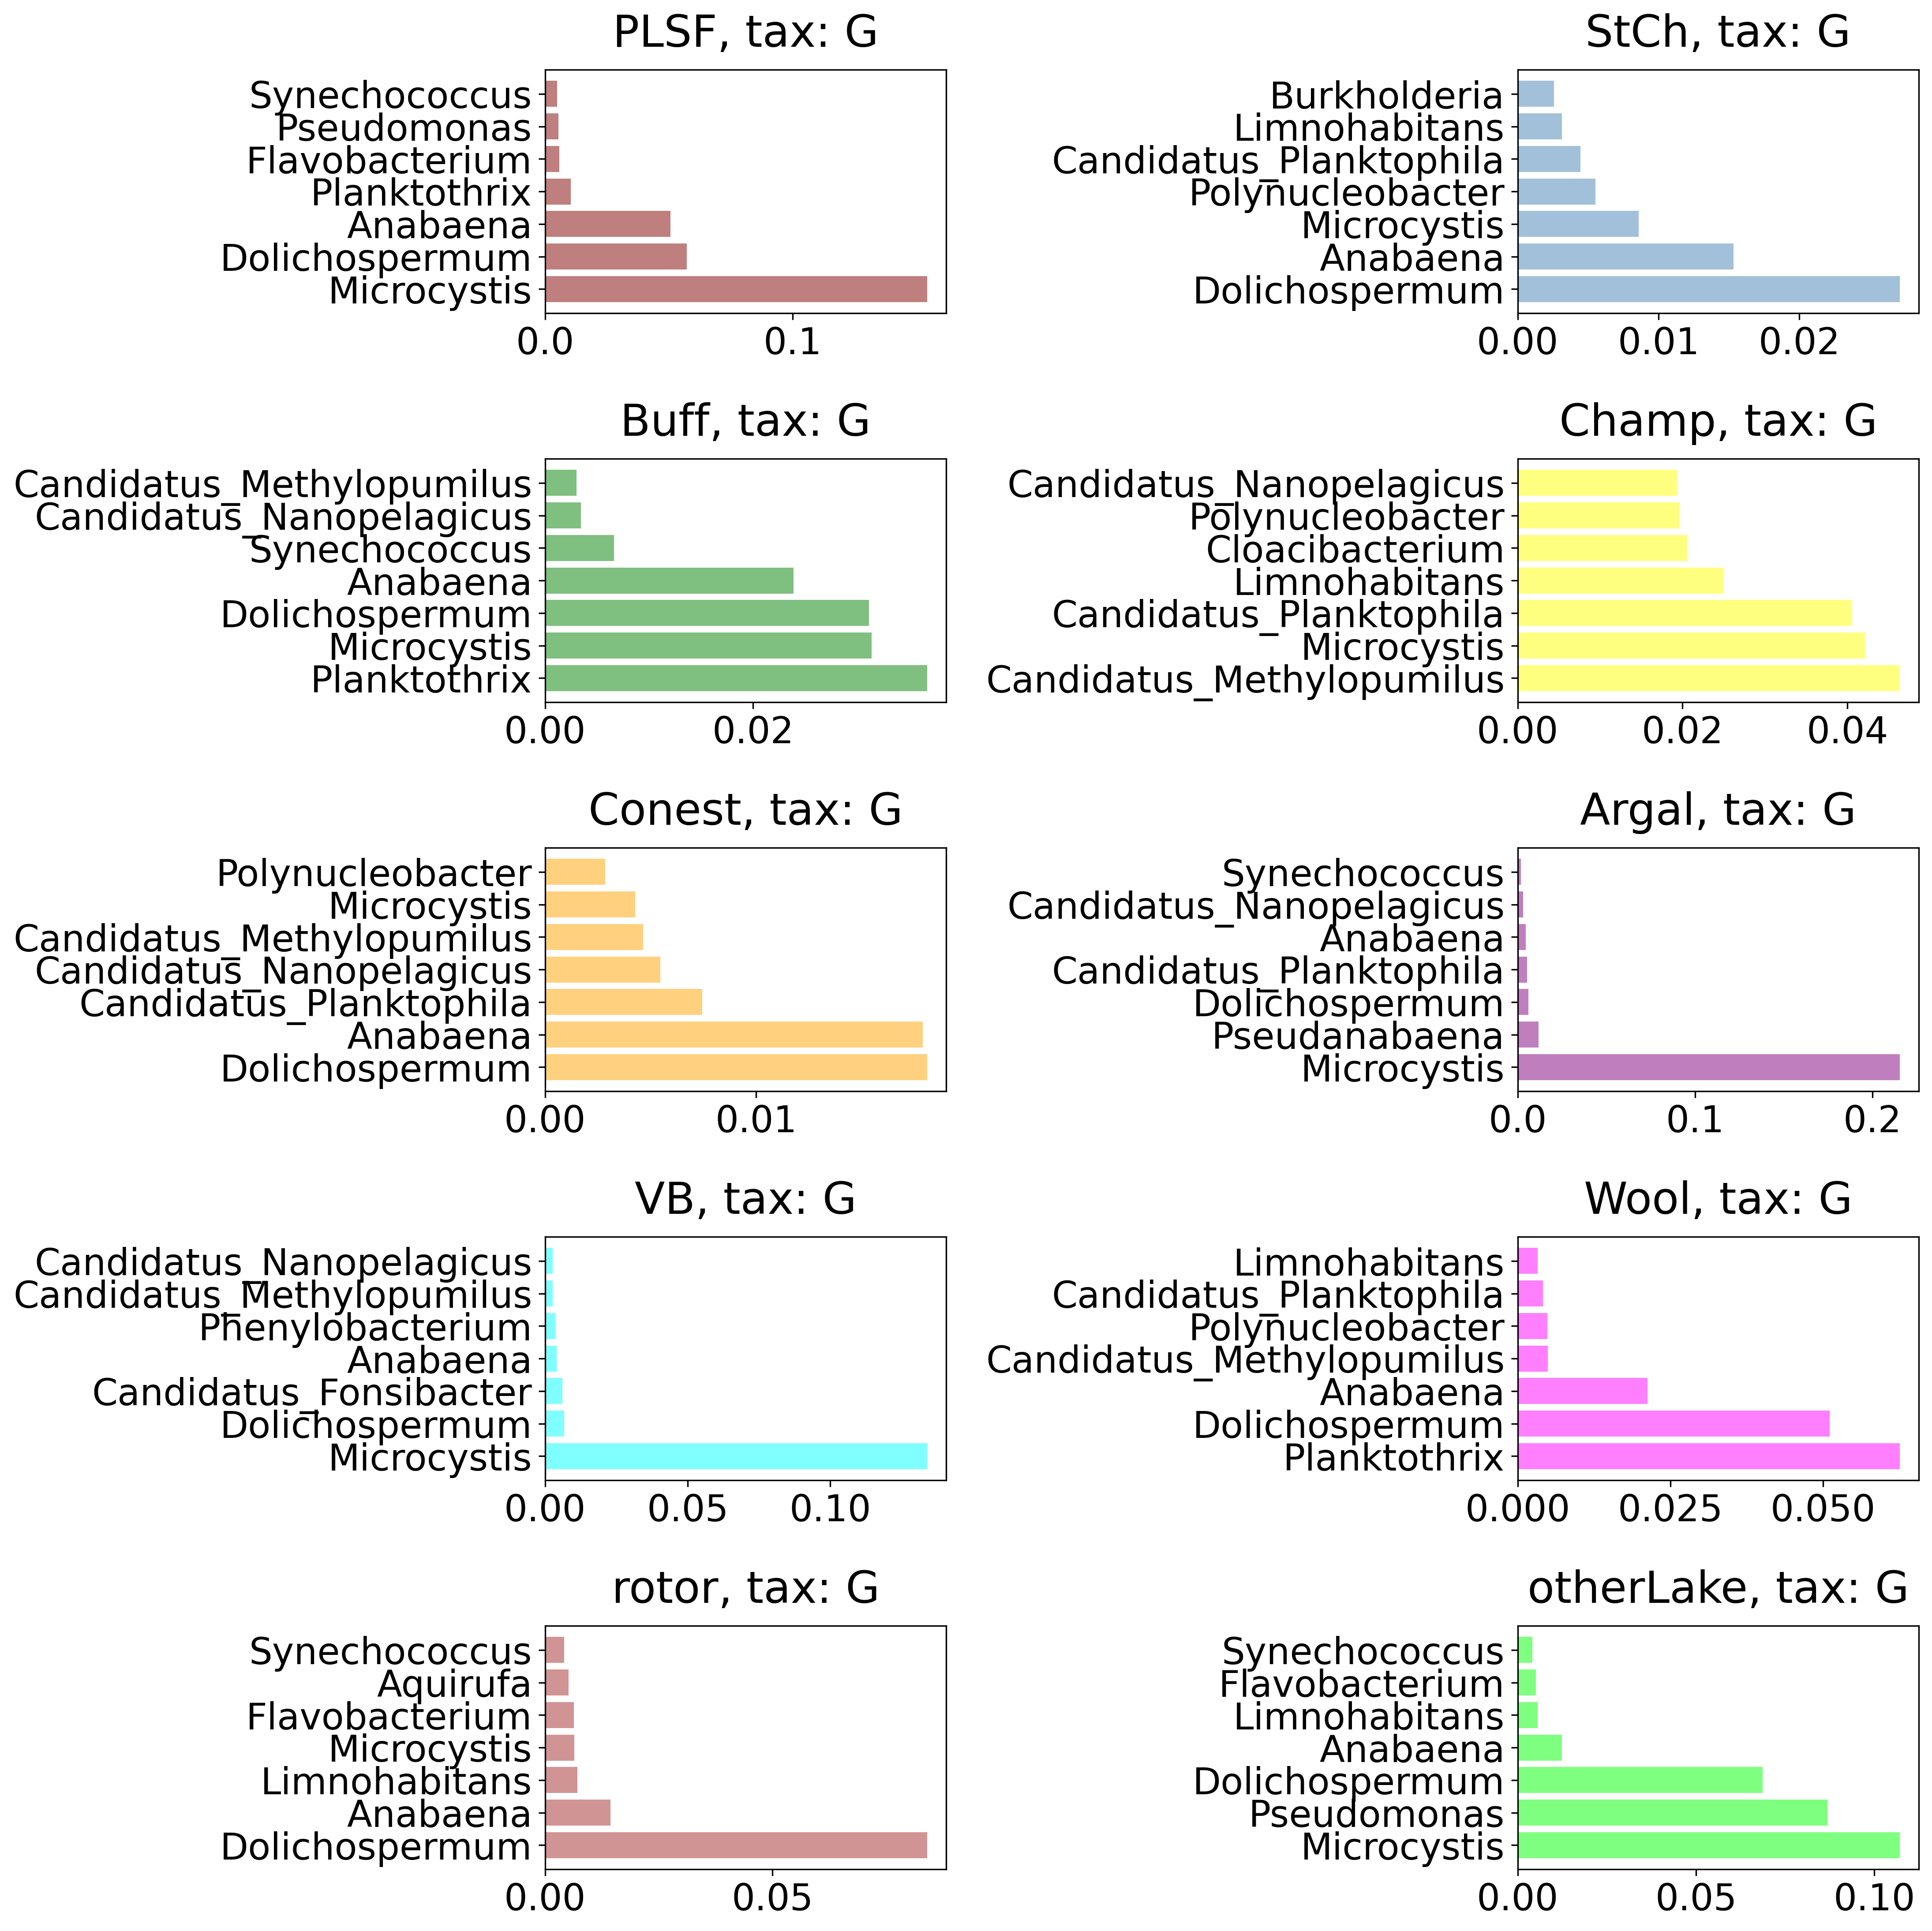

In [9]:
nshow = 7

sorted_cols = {}

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(15,15), dpi=300)
for i, (label, score_label) in enumerate(scores.items()):

    scores_argsort = score_label.argsort()[::-1]
    
    scores_sorted = score_label[scores_argsort]
    labels_sorted = np.array(cols[label])[scores_argsort]
    # Remove the 'g__' prefix
    labels_sorted = [label.replace('g__', '') for label in labels_sorted]

    dataset_name, tax_name = label.split('_')
    
    # Modify indexing here to work with the 2D axes array
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    ax.barh(labels_sorted[:nshow],
            scores_sorted[:nshow],
            alpha=0.5, 
            color=color_dict[dataset_name]
        )

    ax.set_title(dataset_name + f', tax: G')  

plt.tight_layout()
plt.show()


# Calculate pairwise distances*
*for the faster computation

In [10]:
from scipy.spatial.distance import braycurtis, pdist, squareform, jensenshannon
from joblib import Parallel, delayed

In [11]:
 distance_root = f'distances_processed' + DATA_SPECIFICATION
 os.makedirs(distance_root, exist_ok=True)
 distances_names = ['L1', 'L2', 'JS', 'BC']

In [12]:
def compute_pdist_l1(data, name, distance_root):
    data_ = data.copy()
    S = squareform(pdist(data_, metric='minkowski', p=1))
    path = os.path.join(distance_root, f'orig_L1_{name}')
    np.save(path, S)
    
_ = Parallel(n_jobs=len(preprocessed_data))(delayed(compute_pdist_l1)(data.drop(['-1', '1'], 
                                                                                axis=1, 
                                                                                errors='ignore').values, 
                                                                      name, 
                                                                      distance_root) 
                                        for name, data in preprocessed_data.items())


In [13]:
def compute_pdist_l2(data, name, distance_root):
    data_ = data.copy()
    S = squareform(pdist(data_, metric='minkowski', p=2))
    path = os.path.join(distance_root, f'orig_L2_{name}')
    np.save(path, S)
    
_ = Parallel(n_jobs=len(preprocessed_data))(delayed(compute_pdist_l2)(data.drop(['-1', '1'], 
                                                                                axis=1, 
                                                                                errors='ignore').values, 
                                                                      name, 
                                                                      distance_root) 
                                        for name, data in preprocessed_data.items())



In [14]:
def compute_pdist_js(data, name, distance_root):
    
    data_ = data.copy()
    data_ /= data_.sum(1, keepdims=True)
    
    N = data_.shape[0]
    S = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1,N):
            d = jensenshannon(data_[i], data_[j])
            S[i,j] = d
            S[j,i] = d
            
    path = os.path.join(distance_root, f'orig_JS_{name}')
    np.save(path, S)
    
if 'JS' in distances_names:
    _ = Parallel(n_jobs=len(preprocessed_data))(delayed(compute_pdist_js)(data.drop(['-1', '1'], 
                                                                                axis=1, 
                                                                                errors='ignore').values,
                                                                          name, 
                                                                          distance_root) 
                                            for name, data in preprocessed_data.items())

/Users/leydenfernandez/anaconda3/envs/microbiome/lib/python3.9/site-packages/scipy/spatial/distance.py:1300: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


In [ ]:
def compute_pdist_js(data, name, distance_root):
    data_ = data.copy()
    
    # Replace inf and -inf with NaN
    data_ = data_.replace([np.inf, -np.inf], np.nan)
    
    # Drop rows with NaN
    data_ = data_.dropna()
    
    # Add a small constant to avoid division by zero
    data_ = np.maximum(data_, 1e-10)
    
    # Normalize the data
    data_ /= data_.sum(1, keepdims=True)

    # Calculate the Jensen-Shannon distances
    try:
        js_distances = pairwise_distances(data_, metric=jensenshannon, n_jobs=-1)
    except ValueError as e:
        print(f"Error computing Jensen-Shannon distances for {name}: {e}")
        return

    path = os.path.join(distance_root, f'orig_JS_{name}')
    np.save(path, js_distances)

if 'JS' in distances_names:
    _ = Parallel(n_jobs=len(preprocessed_data))(delayed(compute_pdist_js)(data.drop(['-1', '1'], 
                                                                                axis=1, 
                                                                                errors='ignore').values,
                                                                          name, 
                                                                          distance_root) 
                                            for name, data in preprocessed_data.items())




In [15]:
def compute_pdist_bc(data, name, distance_root):
    data_ = data.copy()
    N = data_.shape[0]
    data_ /= data_.sum(1, keepdims=True)
    
    S = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1,N):
            d = braycurtis(data_[i], data_[j])
            S[i,j] = d
            S[j,i] = d
            
    path = os.path.join(distance_root, f'orig_BC_{name}')
    np.save(path, S)
    
if 'BC' in distances_names:
    _ = Parallel(n_jobs=len(preprocessed_data))(delayed(compute_pdist_bc)(data.drop(['-1', '1'], 
                                                                                axis=1, 
                                                                                errors='ignore').values,
                                                                          name,
                                                                          distance_root) 
                                            for name, data in preprocessed_data.items())

In [ ]:
# # uncomment to use synthetic data
# distance_root = 'distances_processed_synth'
# os.makedirs(distance_root, exist_ok=True)
# # only L1 and L2 distances are supported
# distances_names = ['L1', 'L2']


# _ = Parallel(n_jobs=len(preprocessed_data))(delayed(compute_pdist_l1)(data.values, 
#                                                                       name, 
#                                                                       distance_root) 
#                                         for name, data in preprocessed_data.items())

# _ = Parallel(n_jobs=len(preprocessed_data))(delayed(compute_pdist_l2)(data.values, 
#                                                                       name, 
#                                                                       distance_root) 
#                                         for name, data in preprocessed_data.items())